# Hierarchical Bayesian Ranking

TODO:
- incorporate budget

# Get the data

## Statcast data

In [1]:
import pandas as pd
date_range = pd.date_range('2018-03-29', pd.datetime.today()).strftime('%Y-%m-%d')

In [2]:
# import pybaseball
# from concurrent.futures import ThreadPoolExecutor, as_completed

# results = []
# errors = []
# with ThreadPoolExecutor() as executor:
#     futures = {executor.submit(pybaseball.statcast, date): date for date in date_range}
#     for future in as_completed(futures):
#         try:
#             results.append(future.result())
#         except Exception as err:
#             errors.append(err)
#             print(f'could not get data for data {futures[future]}')

In [3]:
# df = pd.concat(results)
# df.shape

In [4]:
# df.to_csv(f'statcast-{pd.datetime.today().strftime("%Y-%m-%d")}.csv', index=False)

In [5]:
df = pd.read_csv("statcast-2018-09-19.csv")

In [6]:
d = df.groupby([
    'game_date', 'home_team', 'away_team', 
], as_index=False)[['post_away_score', 'post_home_score']].max()

In [7]:
d.shape

(2235, 5)

In [8]:
team_ids = {team: i for i, team in enumerate(d.home_team.unique())}
n_teams = len(team_ids)
team_ids

{'ARI': 0,
 'ATL': 1,
 'BAL': 2,
 'BOS': 21,
 'CHC': 29,
 'CIN': 13,
 'CLE': 27,
 'COL': 28,
 'CWS': 22,
 'DET': 14,
 'HOU': 15,
 'KC': 3,
 'LAA': 16,
 'LAD': 4,
 'MIA': 5,
 'MIL': 17,
 'MIN': 23,
 'NYM': 6,
 'NYY': 19,
 'OAK': 7,
 'PHI': 24,
 'PIT': 18,
 'SD': 8,
 'SEA': 9,
 'SF': 20,
 'STL': 25,
 'TB': 10,
 'TEX': 11,
 'TOR': 12,
 'WSH': 26}

In [9]:
import numpy as np
d['home_team_id'] = d.home_team.map(team_ids)
d['away_team_id'] = d.away_team.map(team_ids)
d['home_team_win'] = np.where(d.post_home_score > d.post_away_score, 1, 0)
d['away_team_win'] = np.where(d.post_home_score < d.post_away_score, 1, 0)

## Standings

In [10]:
import requests as rq
import pandas as pd
response = rq.get('https://projects.fivethirtyeight.com/2018-mlb-predictions/')
standings = pd.read_html(response.content)[0]

In [11]:
standings

,Unnamed: 0_level_0,Avg. Simulated SeasonAvg. Simulation,Postseason Chances,Unnamed: 3_level_0,Unnamed: 4_level_0,Unnamed: 5_level_0,Unnamed: 6_level_0,Unnamed: 7_level_0,Unnamed: 8_level_0
,Team▲▼,Division▲▼,Team rating▲▼,1-Week Change▲▼,RecordProj.rec.▲▼,Run Diff.▲▼,Make PlayoffsMakePlay-offs▲▼,WinDivisionWinDiv.▲▼,Win World SeriesWinW.S.▲▼
0,Astros95-57Astros,AL West,1595,-6.0,102-60,258,>99%,99%,20%
1,Red Sox103-49Red Sox,AL East,1586,-8.0,109-53,223,✓,>99%,24%
2,Dodgers85-68Dodgers,NL West,1569,11.0,91-71,165,96%,93%,17%
3,Yankees93-58Yankees,AL East,1565,4.0,99-63,173,>99%,<1%,7%
4,Athletics91-61Athletics,AL West,1561,-3.0,97-65,122,99%,1%,4%
5,Indians85-66Indians,AL Central,1556,1.0,91-71,166,✓,✓,9%
6,Rays85-66Rays,AL East,1550,8.0,91-71,84,1%,—,<1%
7,Cubs89-63Cubs,NL Central,1548,3.0,95-67,119,>99%,89%,10%
8,Cardinals84-69Cardinals,NL Central,1541,-2.0,89-73,79,75%,<1%,3%


In [12]:
team_name_map = {
    'Diamondbacks': 'ARI',
    'Braves': 'ATL',
    'Orioles': 'BAL',
    'Red Sox': 'BOS',
    'Angels': 'LAA',
    'Cubs': 'CHC',
    'White Sox': 'CWS',
    'Reds': 'CIN',
    'Indians': 'CLE',
    'Rockies': 'COL',
    'Tigers': 'DET',
    'Astros': 'HOU',
    'Royals': 'KC',
    'Dodgers': 'LAD',
    'Marlins': 'MIA',
    'Brewers': 'MIL',
    'Twins': 'MIN',
    'Yankees': 'NYY',
    'Athletics': 'OAK',
    'Phillies': 'PHI',
    'Pirates': 'PIT',
    'Padres': 'SD',
    'Mariners': 'SEA',
    'Giants': 'SF',
    'Cardinals': 'STL',
    'Rays': 'TB',
    'Rangers': 'TEX',
    'Blue Jays': 'TOR',
    'Nationals': 'WSH',
    'Mets': 'NYM',
}

In [13]:
def sanitize_name(n):
    out = ''
    for a in n:
        if a.isdigit():
            break
        out += a
    return out
rankings = standings.iloc[:,0].apply(sanitize_name).map(team_name_map)

In [14]:
import numpy as np
rankings = pd.DataFrame({
    'team': rankings,
    'team_id': rankings.map(team_ids),
    'score': np.arange(len(rankings))[::-1]
})

In [15]:
rankings

,team,team_id,score
0,HOU,15,29
1,BOS,21,28
2,LAD,4,27
3,NYY,19,26
4,OAK,7,25
5,CLE,27,24
6,TB,10,23
7,CHC,29,22
8,STL,25,21
9,MIL,17,20


In [16]:
assert not rankings.team.isnull().any()
assert not rankings.team_id.isnull().any()

In [17]:
# center at 10 - negative values restrict how we can model the problem
rankings['score'] = 10 + (rankings['score'] - np.mean(rankings['score'])) / np.std(rankings['score'])

In [18]:
rankings

,team,team_id,score
0,HOU,15,11.675247
1,BOS,21,11.559712
2,LAD,4,11.444178
3,NYY,19,11.328644
4,OAK,7,11.213110
5,CLE,27,11.097575
6,TB,10,10.982041
7,CHC,29,10.866507
8,STL,25,10.750973
9,MIL,17,10.635438


## Aggregate

In [23]:
dd = d.groupby(['home_team', 'home_team_id', 'away_team', 'away_team_id'], as_index=False)[['home_team_win', 'away_team_win']].sum()
dd['total_games'] = dd.home_team_win + dd.away_team_win
dd.head()

,home_team,home_team_id,away_team,away_team_id,home_team_win,away_team_win,total_games
0,ARI,0,ATL,1,1,3,4
1,ARI,0,CHC,29,0,2,2
2,ARI,0,CIN,13,2,1,3
3,ARI,0,COL,28,3,3,6
4,ARI,0,HOU,15,1,1,2


# Model

## With prior rankings and other params

- scale inputs to dirichlet - that way there is no need to worry about negative support for params
- model binomial outcome across all series

In [31]:
import theano.tensor as T
import pymc3 as pm

n_teams = len(team_ids)
n_games = len(dd)
n_matchups = np.array([dd.total_games, dd.total_games]).T
team_rankings = {r.team_id: r.score for _, r in rankings.iterrows()}
# convert to array for convenient indexing
team_rankings_arr = np.array([team_rankings[id_] for id_ in team_ids.values()])
home_team_id = dd.home_team_id
away_team_id = dd.away_team_id
observed_wins = dd[['home_team_win', 'away_team_win']]


def dirichlet(a):
    sum_ = T.sum(a, axis=1)
    # broadcasting
    return a / sum_.reshape((1, -1)).T


with pm.Model() as model:
    b = pm.HalfNormal('b', 1)
    team_abilities_sigma = pm.Uniform('team_abilities_sigma', 0, 2)
    team_abilities = pm.Normal('team_abilities', b*team_rankings_arr, team_abilities_sigma, shape=n_teams)
    home_field_advantage = pm.Normal('home_field_advantage', 0, 1, shape=n_teams)
    home_team_ability = team_abilities[home_team_id] + home_field_advantage[home_team_id]
    away_team_ability = team_abilities[away_team_id]

    matchups = T.stack([home_team_ability, away_team_ability]).T
    prob_winners = pm.Deterministic('prob_winners', dirichlet(matchups))
    p = pm.Binomial('p', n=n_matchups, p=prob_winners, shape=(n_games, 2), observed=observed_wins)

    trace = pm.sample(1_000, model=model)

/Users/dgates/venvs/py3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/dgates/venvs/py3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [home_field_advantage, team_abilities, team_abilities_sigma, b]
/Users/dgat

In [32]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
team_abilities__0,6.474271,1.676477,0.117622,3.454519,9.676412,106.463011,1.000553
team_abilities__1,6.312404,1.565536,0.109679,3.665924,9.528684,107.562538,1.000515
team_abilities__2,2.249660,0.737180,0.047001,0.978041,3.667106,139.197585,1.002105
team_abilities__3,2.853971,0.898774,0.056808,1.360952,4.670980,136.160110,1.001550
team_abilities__4,7.199195,1.836027,0.129819,3.797793,10.653870,106.208732,1.000398
team_abilities__5,3.782238,1.136013,0.078089,1.777423,5.957440,116.011555,1.000815
team_abilities__6,5.487954,1.386543,0.096244,3.143638,8.232846,110.853514,1.001039
team_abilities__7,7.211483,1.915812,0.134713,3.946101,11.060356,104.566873,1.000965
team_abilities__8,4.611304,1.168647,0.079726,2.587944,6.887502,115.819472,1.000473
team_abilities__9,6.423955,1.669875,0.115912,3.493665,9.575714,106.964063,1.000983


/Users/dgates/venvs/py3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1264ea860>,
      dtype=object)

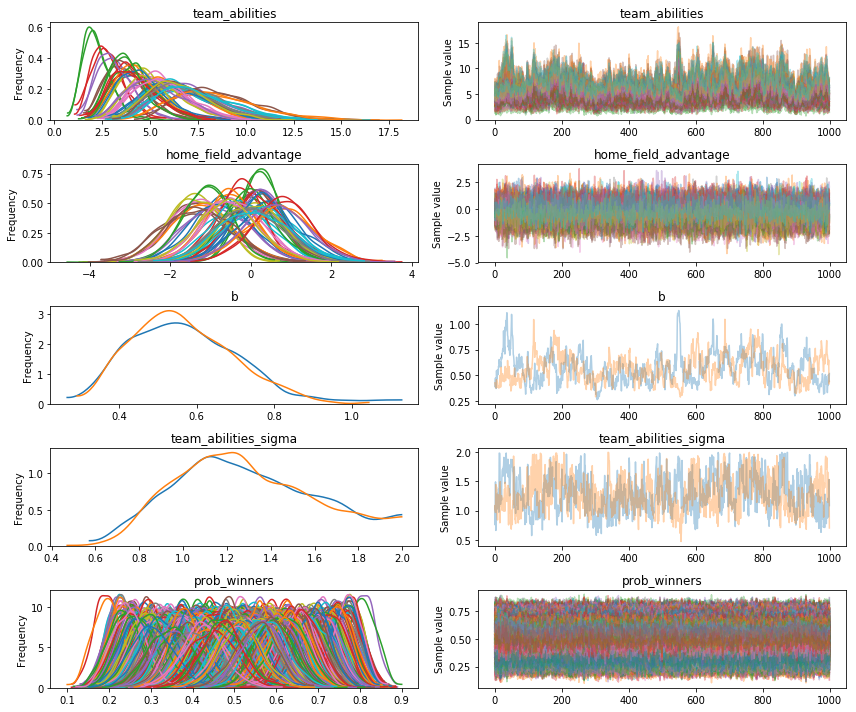

In [33]:
pm.plots.traceplot(trace)

In [34]:
estimated_abilities = trace['team_abilities'].mean(axis=0)
estimated_abilities_error = trace['team_abilities'].std(axis=0)

In [35]:
team_id_lookup = {v: k for k, v in team_ids.items()}

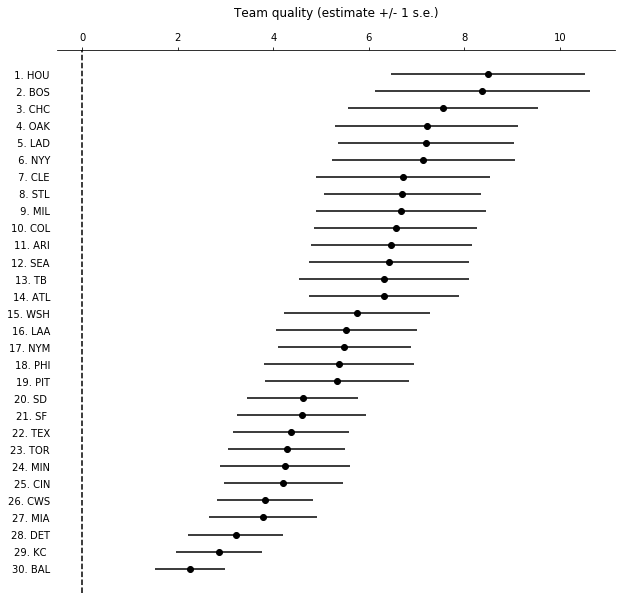

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


values = list(reversed(estimated_abilities))
labels = list(reversed([team_id_lookup[i] for i in range(n_teams)]))
errors = list(reversed(estimated_abilities_error))

tmp = sorted(zip(values, labels, errors), key=lambda x: x[0])
values, labels, errors = zip(*tmp)
labels = [f'{n_teams-i:2}. {L:3}' for i, L in enumerate(labels)]

fig, ax = plt.subplots(figsize=(10, 10))

# remove borders
sns.despine(left=True, bottom=True, top=False)

# plot error bars
ax.errorbar(values, range(len(labels)), xerr=errors, fmt='o', color='k')

# label the y-adxis
plt.yticks(np.arange(len(labels)))
locs, _ = plt.yticks()
plt.yticks(locs, labels)
plt.tick_params(axis='y', which='both', left=False)

# give it a reference line
ax.axvline(0, linestyle='--', color='k')

# Move x axis to top
ax.xaxis.tick_top()

# polish it off with a title
_ = ax.set_title('Team quality (estimate +/- 1 s.e.)', y=1.05)

# Simulate Outcomes

In [37]:
n = 10_000

def simulate_outcome(team1, team2):
    id1, id2 = team_ids[team1], team_ids[team2]
    advantage = trace['home_field_advantage'][:,id1].T
    trace1, trace2 = trace['team_abilities'][:, [id1, id2]].T
    sim1, sim2 = np.random.choice(trace1, size=n) + np.random.choice(advantage, size=n), np.random.choice(trace2, size=n)
    denom = sim1 + sim2
    p1, p2 = sim1 / denom, sim2 / denom
    p_home = (p1 > p2).sum() / len(p1)
    return p_home, 1-p_home

In [38]:
simulate_outcome('BOS', 'BAL')

(0.9997, 0.00029999999999996696)

In [44]:
simulate_outcome('BAL', 'BOS')

(0.0011, 0.9989)

In [39]:
simulate_outcome('PHI', 'NYM')

(0.5884, 0.41159999999999997)

In [40]:
simulate_outcome('NYM', 'PHI')

(0.308, 0.692)

In [41]:
simulate_outcome('PHI', 'BOS')

(0.1979, 0.8021)

In [42]:
simulate_outcome('BOS', 'PHI')

(0.911, 0.08899999999999997)

## Evaluate

In [125]:
id1, id2 = 10, 11
advantage = trace['home_field_advantage'][:,id1]
trace1, trace2 = trace['team_abilities'][:, [id1, id2]].T

In [130]:
s1 = np.random.choice(trace1, size=N) + np.random.choice(advantage, size=N)
s2 = np.random.choice(trace2, size=N)
denom = s1 + s2
p = s1 / denom
p

array([0.53031001, 0.7478306 , 0.42419763, ..., 0.7628813 , 0.64161808,
       0.57853917])

In [139]:
ss.binom(p=p, n=3).rvs()

array([2, 3, 2, ..., 3, 2, 2])

In [168]:
import scipy.stats as ss

N = 10_000

def simulate_outcome(team1, team2, n_matchups):
    id1, id2 = team_ids[team1], team_ids[team2]
    advantage = trace['home_field_advantage'][:,id1].T
    trace1, trace2 = trace['team_abilities'][:, [id1, id2]].T
    sample1 = np.random.choice(trace1, size=N) + np.random.choice(advantage, size=N)
    sample2 = np.random.choice(trace2, size=N)
    denom = sample1 + sample2
    p = sample1 / denom
    print(p.min(), p.max())
    return ss.binom(p=p, n=n_matchups).rvs()

In [169]:
res = dd.apply(lambda x: simulate_outcome(x.home_team, x.away_team, x.total_games), axis=1)
res

0.05859269576318183 0.8013508453562967
0.05701099488222203 0.7637460568051486
0.05321492683794276 0.7717727897687221
0.10232845497767441 0.851446484163678
0.06677068410800785 0.7677462887445548
0.0738235645916566 0.7112313676997881
0.020707134461169698 0.8039696868998014
0.08558156405619682 0.7741439438165435
0.15411866753742381 0.887634033766975
0.028895492270257808 0.8047032808756042
0.11652169063762308 0.812171932953557
0.10899000954360215 0.8227635445957387
0.1021767359271742 0.8295999329610544
0.11555591658193326 0.830869537769264
0.09800517951961416 0.7924515033548304
0.15676754098150522 0.8550453564156314
0.06446386269203501 0.7460793156389425
0.1409730962072343 0.8489466180344875
0.10146777284487409 0.7981215312533159
-0.06726820118070656 0.7679447254940583


ValueError: ('Domain error in arguments.', 'occurred at index 18')

In [56]:
labels = dd.apply(lambda x: f'{x.home_team} vs. {x.away_team}', axis=1)

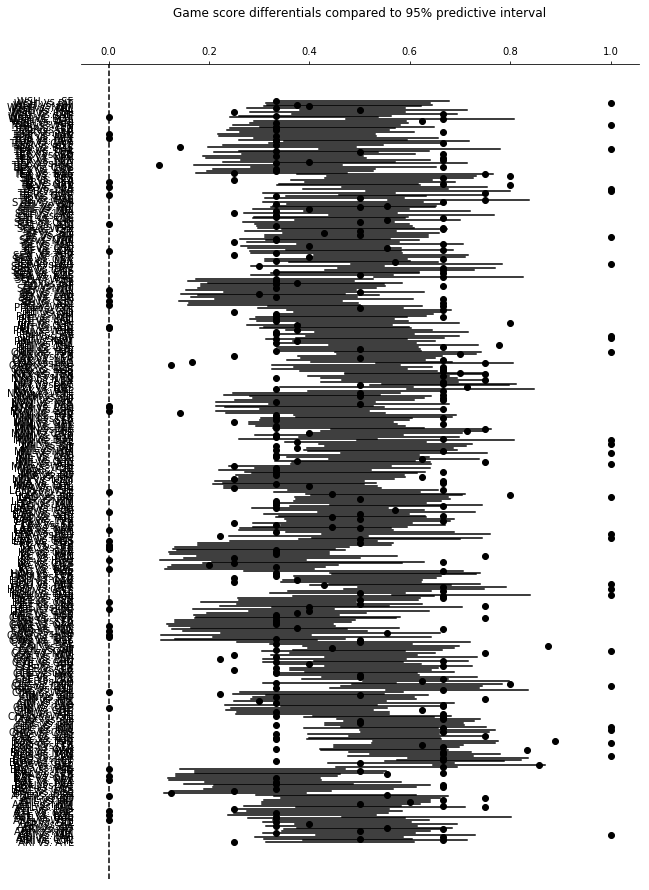

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 15))

# remove borders
sns.despine(left=True, bottom=True, top=False)

# plot actual outcome
ax.scatter(dd.home_win_pct, range(len(labels)), color='k')

# plot error bars
for idx, (L, H) in enumerate(zip(low, high)):
#     low, high = mean - error, mean + error
    ax.plot([L, H], [idx, idx], color='k')

# label the y-adxis
plt.yticks(np.arange(len(labels)))
locs, _ = plt.yticks()
plt.yticks(locs, labels)
plt.tick_params(axis='y', which='both', left=False)

# give it a reference line
ax.axvline(0, linestyle='--', color='k')

# Move x axis to top
ax.xaxis.tick_top()

# polish it off with a title
_ = ax.set_title('Game score differentials compared to 95% predictive interval', y=1.05)